# Computing spatial heterogeneity scores with SHouT

## Import packages and load example datasets

In [1]:
import squidpy as sq
import seaborn as sns
import shout
import pandas as pd
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
import scipy.stats as stats
import scanpy as sc

/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/surya/anaconda3/envs/spatial_proteomics_cloned_xai/lib/python3.10/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
mibitof = sq.datasets.mibitof()
seqfish = sq.datasets.seqfish()

## Compute and visualize scores for MIBI-TOF data

In [3]:
%%time
shout.all_scores(mibitof, cluster_key='Cluster', radii=[1,2,3,4,5])

CPU times: user 24.8 s, sys: 167 ms, total: 25 s
Wall time: 25 s


In [4]:
mibitof.obs

,row_num,point,cell_id,X1,center_rowcoord,center_colcoord,cell_size,category,donor,Cluster,...,egophily_2,local_entropy_3,local_homophily_3,egophily_3,local_entropy_4,local_homophily_4,egophily_4,local_entropy_5,local_homophily_5,egophily_5
3034-0,3086,23,2,60316.0,269.0,7.0,408.0,carcinoma,21d7,Epithelial,...,0.304348,0.759748,0.338983,0.326531,0.804425,0.300000,0.360825,0.821688,0.315789,0.383234
3035-0,3087,23,3,60317.0,294.0,6.0,408.0,carcinoma,21d7,Epithelial,...,0.428571,0.749998,0.388235,0.324324,0.825517,0.300971,0.329412,0.838350,0.305344,0.355263
3036-0,3088,23,4,60318.0,338.0,4.0,304.0,carcinoma,21d7,Imm_other,...,0.384615,0.825433,0.309091,0.211268,0.846400,0.302326,0.229630,0.871895,0.284630,0.207071
3037-0,3089,23,6,60320.0,372.0,6.0,219.0,carcinoma,21d7,Myeloid_CD11c,...,0.148148,0.844247,0.284884,0.136986,0.854379,0.295652,0.081481,0.871908,0.288931,0.089552
3038-0,3090,23,8,60322.0,417.0,5.0,303.0,carcinoma,21d7,Myeloid_CD11c,...,0.136364,0.851479,0.275641,0.119403,0.858162,0.299694,0.084615,0.873020,0.281008,0.087179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47342-2,48953,16,1103,2779.0,143.0,1016.0,283.0,carcinoma,90de,Fibroblast,...,0.200000,0.812948,0.265306,0.150000,0.848564,0.281609,0.228571,0.901382,0.265517,0.212389
47343-2,48954,16,1104,2780.0,814.0,1017.0,147.0,carcinoma,90de,Fibroblast,...,0.333333,0.832403,0.258621,0.200000,0.827052,0.227451,0.186275,0.827406,0.222222,0.193939
47344-2,48955,16,1105,2781.0,874.0,1018.0,142.0,carcinoma,90de,Imm_other,...,0.290323,0.791230,0.278409,0.305556,0.821498,0.246201,0.283465,0.825959,0.229376,0.252688
47345-2,48956,16,1106,2782.0,257.0,1019.0,108.0,carcinoma,90de,Fibroblast,...,0.257143,0.933579,0.255556,0.202703,0.928575,0.231481,0.228346,0.922375,0.237354,0.214286


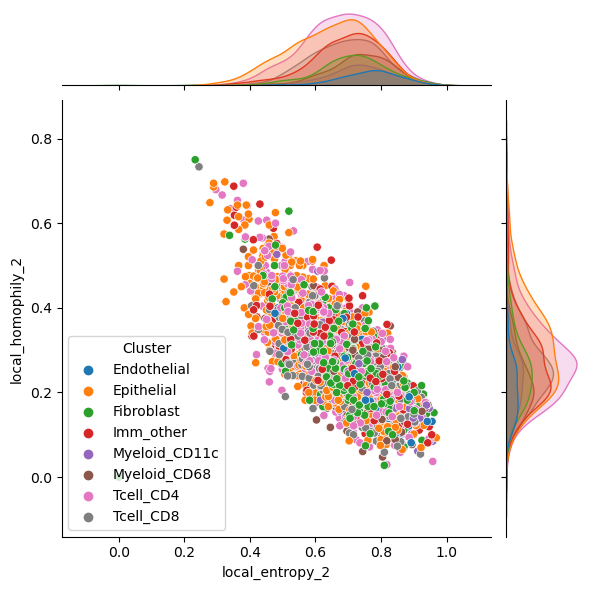

In [5]:
sns.jointplot(data=mibitof.obs, x='local_entropy_2', y='local_homophily_2', hue='Cluster')

- These results show that helper T cells (Th) and epithelial cells (Ep) are the most abundant in the MIBI TOF dataset.

- Additionally, it also shows that endothelial cells have the highest local entropy score and local homophily score, whereas Th and Ep cells are most abundant at a lower score for both local entropy as well as local homophily. Moreover, for all cell types, the distribution matches for local homophily and local entropy scores, therefore suggesting that cell types that are likely to contain the most information are also the most diversely connected.

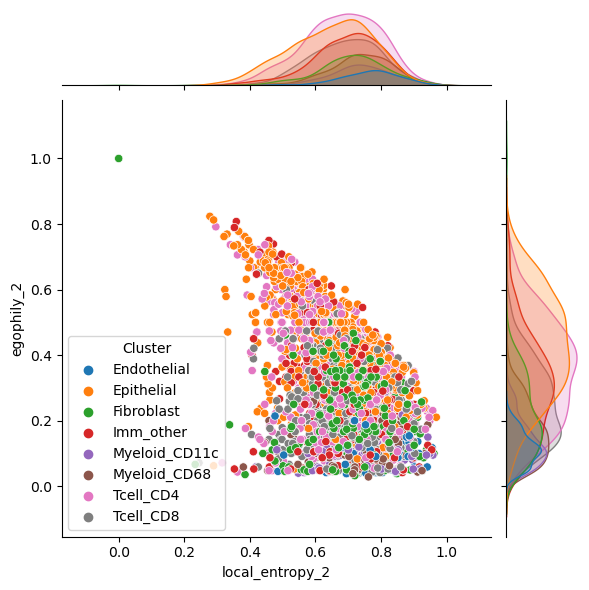

In [6]:
sns.jointplot(data=mibitof.obs, x='local_entropy_2', y='egophily_2', hue='Cluster')

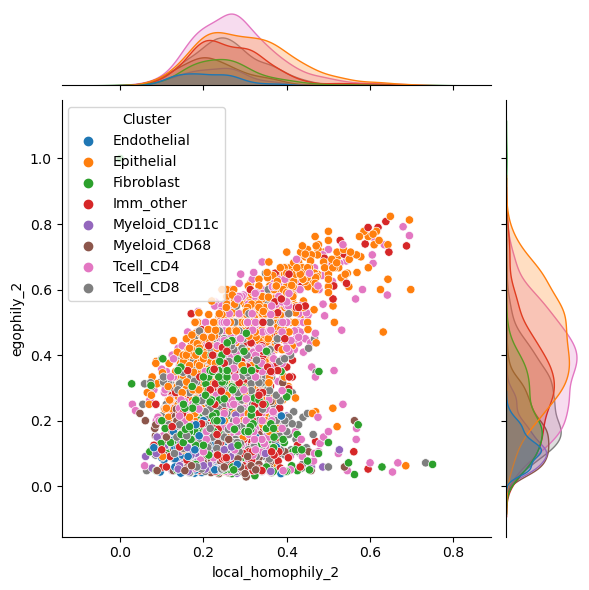

In [7]:
sns.jointplot(data=mibitof.obs, x='local_homophily_2', y='egophily_2', hue='Cluster')

- The results suggest that all cell types except endothelial cells (End) and myeloid dendritic cells (Md), i.e., Ep, fibroblasts (Fib), immune cells (Imm), CD68+ macrophages (Mac), Th and cytotoxic T cells (Tc), have a pretty uniform distribution of egophily--meaning they appear both in the presence of other cell types, as well as in clusters of similar celltypes. This can be explained by the articulate but well spread-out patterns of Ep, Th and Fib cells.

## Compute and visualize scores for seqFISH data

In [11]:
%%time
scores_seqfish = shout.all_scores(seqfish, cluster_key='celltype_mapped_refined', radii=[2])

CPU times: user 3min 5s, sys: 2.49 s, total: 3min 7s
Wall time: 3min 7s


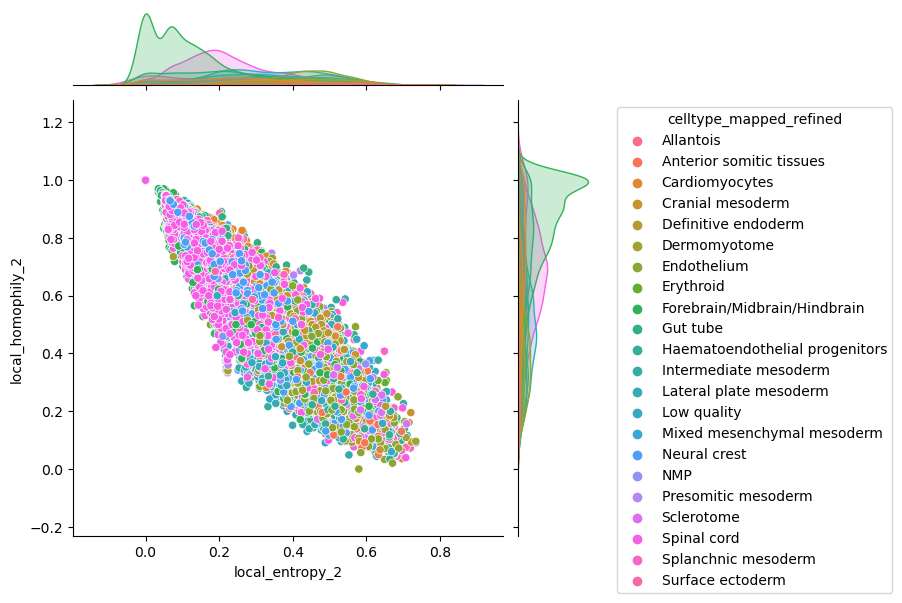

In [12]:
f = sns.jointplot(data=seqfish.obs, x='local_entropy_2', y='local_homophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

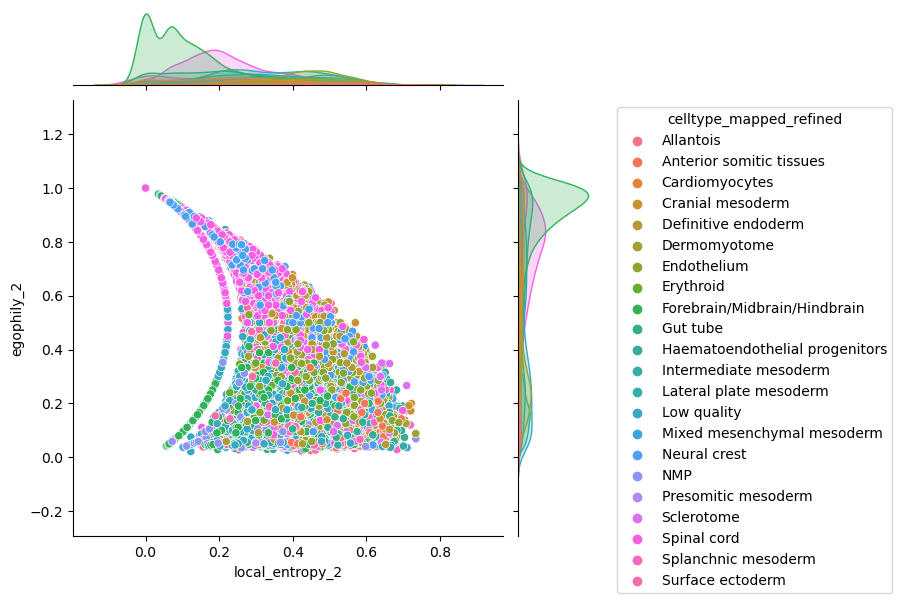

In [13]:
f = sns.jointplot(data=seqfish.obs, x='local_entropy_2', y='egophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

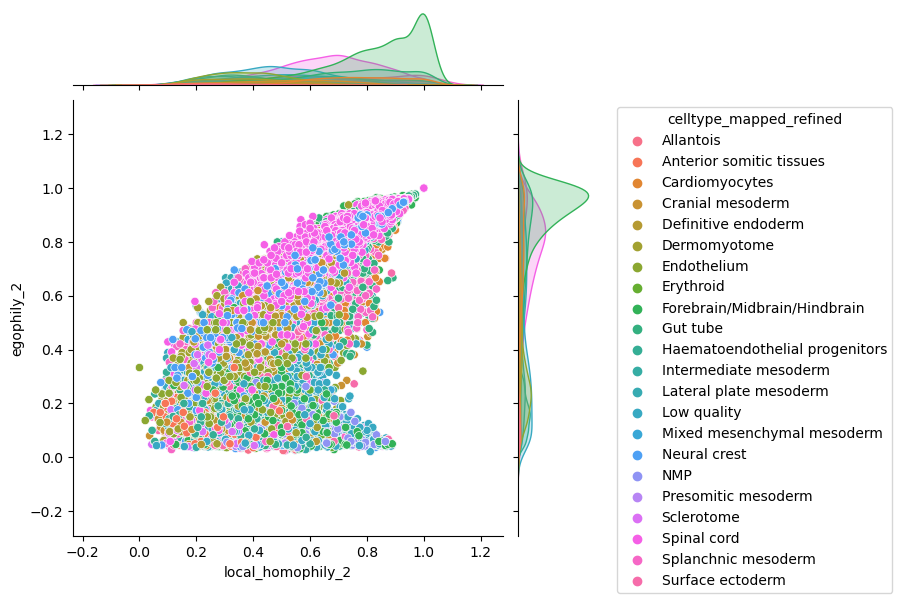

In [14]:
f = sns.jointplot(data=seqfish.obs, x='local_homophily_2', y='egophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))